# Sample exercises in statistical methods of data analysis course

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# H1.1 shared distribution

we have a particle detector that measures charge deposited by a radioactive source.Our first measurement is to calculate the decay rate by logging the time
that each decay is detected, and finding the average interval between decays.We will perform 6 sets of measurements. Each set will consist of 50,000 repetitions of the same measurement.Each measurement consists of a single estimation (mean) of the decay rate derived from recording the interval
∆t N times. Each set corresponds to one value of N from N = 1, 2, 4, 8, 20, 100.

Here are plots showing the distribution of the estimated rate . Verifying that
the distribution of estimated rates becomes Gaussian as N → ∞.

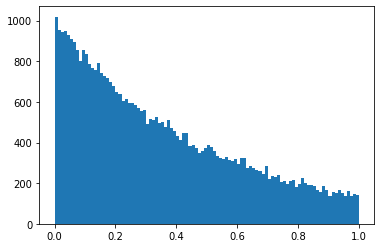

variance for N = 1 : 0.25276212894649003


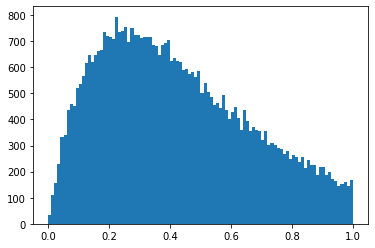

variance for N = 2 : 0.12509339874551412


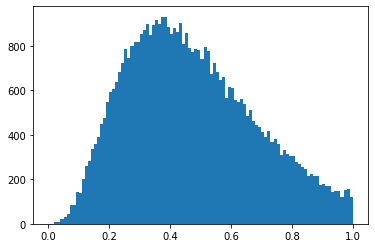

variance for N = 4 : 0.0628599505983665


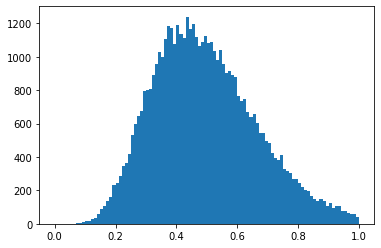

variance for N = 8 : 0.0318431529257516


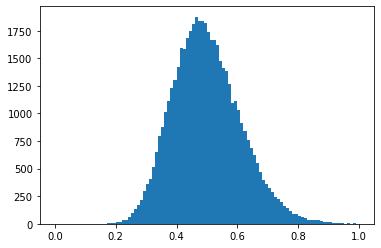

variance for N = 20 : 0.012424714257642903


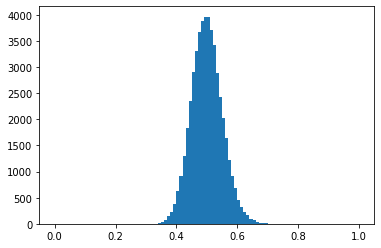

variance for N = 100 : 0.0025213287215284244


In [2]:
N=(1,2,4,8,20,100)
for j in range(len(N)):
    y=[]
    for i in range(50000): 
     x = np.random.exponential(0.5,N[j])
     y.append(np.mean(x))
    _ = plt.hist(y,100,(0,1))
    plt.show()
    print('variance for N =',N[j],':',np.var(y))

# H1.2 independent distributions

to measure the energy
of the tracks radioactive source deposits in our detector. As each track is deposited, transported, detected, amplified, and
digitized, it accumulates random errors.Let’s assume that each track ionizes 10.0 ± 0.1 MeV in our detector. So our starting PDF is a Gaussian with
μ0 = 10.0 and σ0 = 0.1. Now let’s add a number of random errors, each of which has μi = 0 and a comparable
width.

Producing plots showing the measured charge
distribution after each stage of adding random errors

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def gauss(x: float):  
    mu, sig = 10.0, 0.1
    return np.exp(-(x - mu)**2 / (sig**2))
def cos(x:float):
    if x>-1 and x<1:
        f2=(np.cos((math.pi)*x))**2
    else:
        f2=0
    return f2
def exp(x:float):
    if x>-1 and x<10:
        f3=np.exp(-(x+1))
    else:
        f3=0
    return f3
def uni(x:float):
    f4=0
    if x>-1 and x<1:
        f4=1
    return f4
def circ(x:float):
    f5=0
    if x>-1 and x<1:
        f5=np.sqrt(1-(x**2))
    return f5
def lin(x:float):
    f6=0
    if x>-4/3 and x<2/3:
        f6= x+(4/3)
    return f6

In [4]:
def generate_rand_from_pdf(pdf, n, xmin, xmax): 
    xvals = np.linspace(xmin, xmax, n*10)
    pdfvals = np.array([ pdf(x) for x in xvals])
    cdf = np.cumsum(pdfvals)
    cdf = cdf / cdf[-1] 
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values) #returns indices where the rand values are to be added to get the distribution
    random_from_cdf = xvals[value_bins] #basically randomy choosing x values.
    return random_from_cdf  #you get random x_values
#since the function is not changing much between x=1 and 10, cdf wont change much, hence may bars from that region. 

In [5]:
rands1 = generate_rand_from_pdf(gauss, 5000, 0,15)
rands2 = generate_rand_from_pdf(cos, 5000, -1,1)
rands3 = generate_rand_from_pdf(exp, 5000, -1,10)
rands4= generate_rand_from_pdf(uni, 5000, -1,1)
rands5 = generate_rand_from_pdf(circ, 5000, -1,1)
rands6 = generate_rand_from_pdf(lin, 5000, -4/3,2/3)
#x1=np.linspace(0,10)
#print(uni(x1[5]))
y1=rands1
y2=rands1+rands2
y3=rands1+rands2+rands3
y4=rands1+rands2+rands3+rands4
y5=rands1+rands2+rands3+rands4+rands5
y6=rands1+rands2+rands3+rands4+rands5+rands6
#print(y1[0],y2[0],rands2[0])

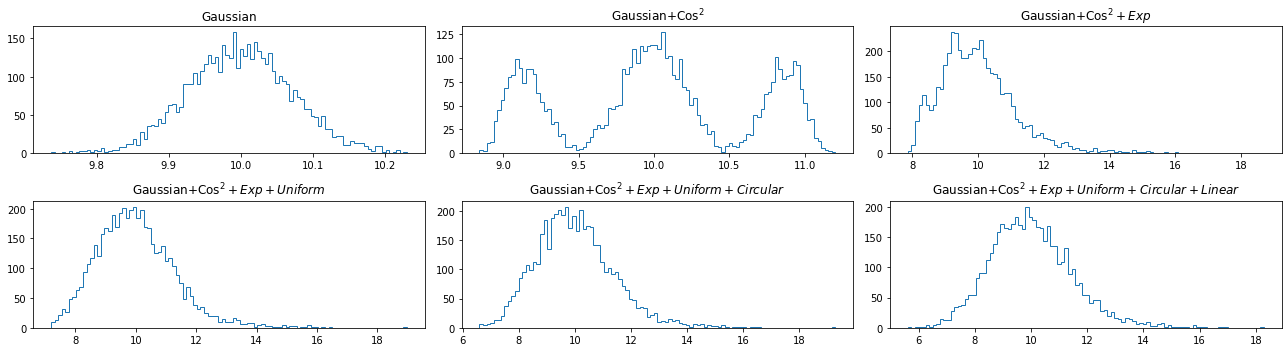

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))
counts1, bin_edges1, _=axs[0, 0].hist(y1,bins=100, histtype='step')
axs[0, 0].set_title('Gaussian')
counts2, bin_edges2, _=axs[0, 1].hist(y2,bins=100, histtype='step')
axs[0, 1].set_title(r'Gaussian+Cos$^{2}$')
counts3, bin_edges3, _=axs[0, 2].hist(y3,bins=100, histtype='step')
axs[0, 2].set_title(r'Gaussian+Cos$^{2}+Exp$')
counts4, bin_edges4, _=axs[1, 0].hist(y4,bins=100, histtype='step')
axs[1, 0].set_title(r'Gaussian+Cos$^{2}+Exp+Uniform$')
counts5, bin_edges5, _=axs[1, 1].hist(y5,bins=100, histtype='step')
axs[1, 1].set_title(r'Gaussian+Cos$^{2}+Exp+Uniform+Circular$')
counts6, bin_edges6, _=axs[1, 2].hist(y6,bins=100, histtype='step')
axs[1, 2].set_title(r'Gaussian+Cos$^{2}+Exp+Uniform+Circular+Linear$')
#counts1, bin_edges1, _ = plt.hist(rands,bins=100, histtype='step')
fig.tight_layout()
#counts=[counts1,counts2,counts3,counts4,counts5,counts6]

we see that after adding a number of totally random errors the distribution is again Gaussian!

then here I fitted a guassian to these plots by the code that was given to us in exercise sheet

Text(0.3, 10.0, 'mean$=9.999 $\nstd$=0.072 $\nconstant$=136.786 \\pm 1.692$\n$\\mu=9.998 \\pm 0.001$\n$\\sigma=0.072 \\pm 0.001$')

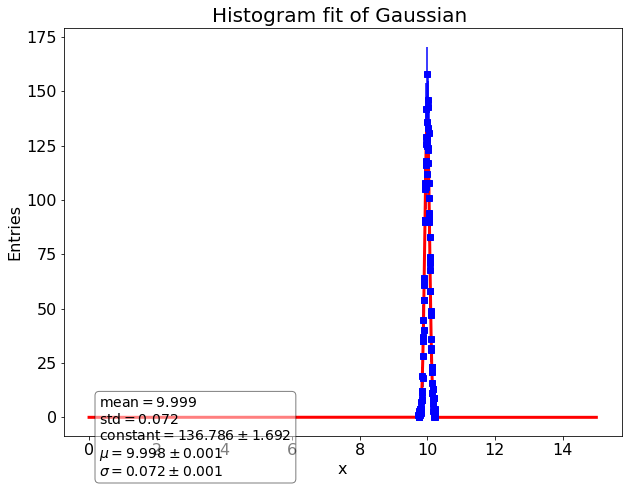

In [7]:
import scipy.stats

bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:])/2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:])/2
bin_centers3 = (bin_edges3[:-1] + bin_edges3[1:])/2
bin_centers4 = (bin_edges4[:-1] + bin_edges4[1:])/2
bin_centers5 = (bin_edges5[:-1] + bin_edges5[1:])/2
bin_centers6 = (bin_edges6[:-1] + bin_edges6[1:])/2

#Create data points for the fit function
x = np.linspace(0,15,5000)

#Define a gaussian function to use for the fit.
#a, x0, sigma will be the fitter parameters
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

#Fitted parameters and covariance matrix
popt1, pcov1 = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers1, ydata=counts1,p0=[5000,10,0.1])
popt2, pcov2 = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers2, ydata=counts2,p0=[5000,10,0.1])
popt3, pcov3 = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers3, ydata=counts3,p0=[5000,10,0.1])
popt4, pcov4 = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers4, ydata=counts4,p0=[5000,10,0.1])
popt5, pcov5 = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers5, ydata=counts5,p0=[5000,10,0.1])
popt6, pcov6 = scipy.optimize.curve_fit(f = gaus, xdata = bin_centers6, ydata=counts6,p0=[5000,10,0.1])

#Calculate data and fit parameters 

popt=[popt1,popt2,popt3,popt4,popt5,popt6]
pcov=[pcov1,pcov2,pcov3,pcov4,pcov5,pcov6]

#for i in range(5):
    
data_mean1 = np.mean(y1)
data_mean2 = np.mean(y2)
data_mean3 = np.mean(y3)
data_mean4 = np.mean(y4)
data_mean5 = np.mean(y5)
data_mean6 = np.mean(y6)

data_std1 = np.std(y1, ddof=1)
data_std2 = np.std(y2, ddof=1)
data_std3 = np.std(y3, ddof=1)
data_std4 = np.std(y4, ddof=1)
data_std5 = np.std(y5, ddof=1)
data_std6 = np.std(y6, ddof=1)

fit_constant1, fit_constant_error1 = popt1[0], np.sqrt(pcov1[0,0])
fit_mean1, fit_mean_error1 = popt1[1], np.sqrt(pcov1[1,1])
fit_std1, fit_std_error1 = popt1[2], np.sqrt(pcov1[2,2])

fig = plt.figure(figsize=(10,7.5))
plt.errorbar(bin_centers1, counts1, np.sqrt(counts1),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt1), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('Histogram fit of Gaussian ', fontsize=20)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean1),
    r'std$=%.3f $' % data_std1,
    r'constant$=%.3f \pm %.3f$' % (fit_constant1, fit_constant_error1),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean1, fit_mean_error1),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std1, fit_std_error1)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)

#Create a figure


#Plot data with errors


Text(0.3, 10.0, 'mean$=10.000 $\nstd$=0.626 $\nconstant$=113.919 \\pm 12.788$\n$\\mu=9.997 \\pm 0.028$\n$\\sigma=0.216 \\pm 0.001$')

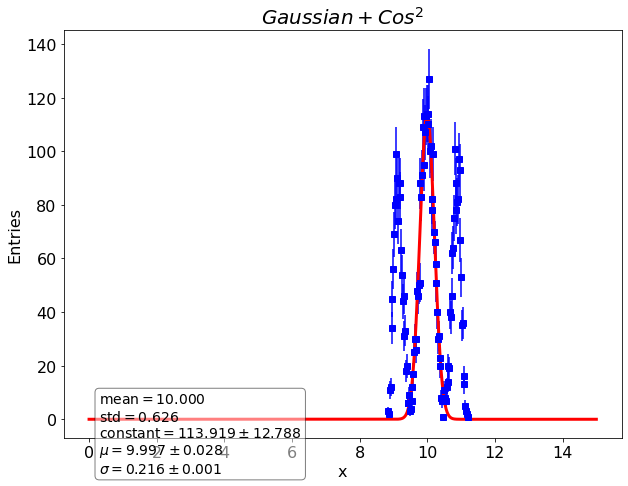

In [8]:
fit_constant2, fit_constant_error2 = popt2[0], np.sqrt(pcov2[0,0])
fit_mean2, fit_mean_error2 = popt2[1], np.sqrt(pcov2[1,1])
fit_std2, fit_std_error2 = popt2[2], np.sqrt(pcov1[2,2])

fig = plt.figure(figsize=(10,7.5))
plt.errorbar(bin_centers2, counts2, np.sqrt(counts2),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt2), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('$Gaussian+Cos^2$', fontsize=20)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean2),
    r'std$=%.3f $' % data_std2,
    r'constant$=%.3f \pm %.3f$' % (fit_constant2, fit_constant_error2),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean2, fit_mean_error2),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std2, fit_std_error2)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)

Text(0.3, 10.0, 'mean$=9.987 $\nstd$=1.165 $\nconstant$=210.710 \\pm 3.999$\n$\\mu=9.741 \\pm 0.023$\n$\\sigma=1.020 \\pm 0.024$')

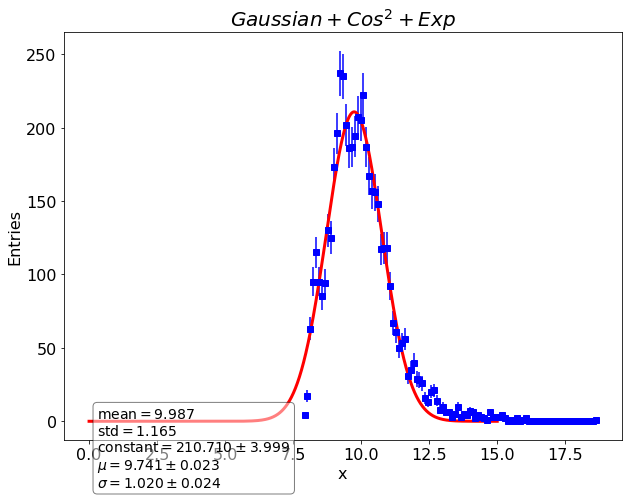

In [9]:
fit_constant3, fit_constant_error3 = popt3[0], np.sqrt(pcov3[0,0])
fit_mean3, fit_mean_error3 = popt3[1], np.sqrt(pcov3[1,1])
fit_std3, fit_std_error3 = popt3[2], np.sqrt(pcov3[2,2])

fig = plt.figure(figsize=(10,7.5))
plt.errorbar(bin_centers3, counts3, np.sqrt(counts3),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt3), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('$Gaussian+Cos^2+Exp$', fontsize=20)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean3),
    r'std$=%.3f $' % data_std3,
    r'constant$=%.3f \pm %.3f$' % (fit_constant3, fit_constant_error3),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean3, fit_mean_error3),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std3, fit_std_error3)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)

Text(0.3, 10.0, 'mean$=9.993 $\nstd$=1.298 $\nconstant$=194.758 \\pm 2.178$\n$\\mu=9.813 \\pm 0.015$\n$\\sigma=1.199 \\pm 0.016$')

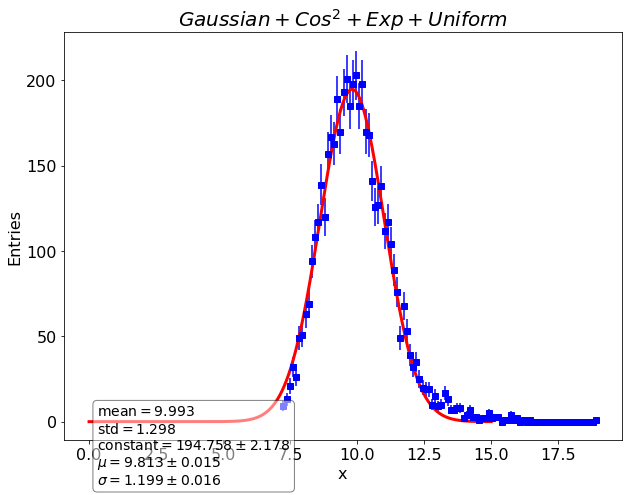

In [10]:
fit_constant4, fit_constant_error4 = popt4[0], np.sqrt(pcov4[0,0])
fit_mean4, fit_mean_error4 = popt4[1], np.sqrt(pcov4[1,1])
fit_std4, fit_std_error4 = popt4[2], np.sqrt(pcov4[2,2])

fig = plt.figure(figsize=(10,7.5))
plt.errorbar(bin_centers4, counts4, np.sqrt(counts4),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt4), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('$Gaussian+Cos^2+Exp+Uniform$', fontsize=20)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean4),
    r'std$=%.3f $' % data_std4,
    r'constant$=%.3f \pm %.3f$' % (fit_constant4, fit_constant_error4),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean4, fit_mean_error4),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std4, fit_std_error4)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)

Text(0.3, 10.0, 'mean$=9.999 $\nstd$=1.393 $\nconstant$=193.793 \\pm 2.737$\n$\\mu=9.827 \\pm 0.021$\n$\\sigma=1.294 \\pm 0.021$')

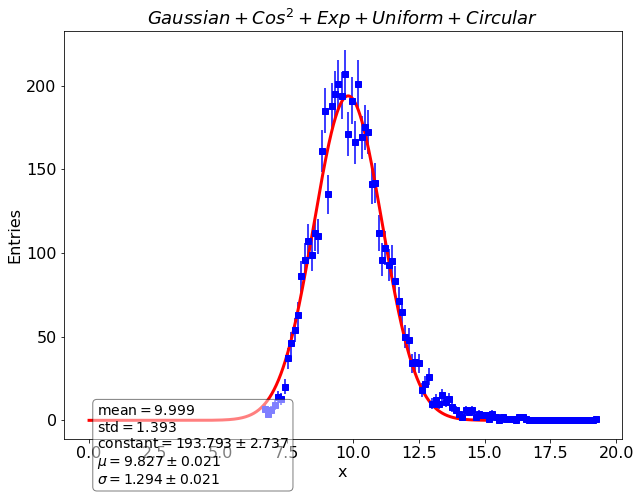

In [12]:
fit_constant5, fit_constant_error5 = popt5[0], np.sqrt(pcov5[0,0])
fit_mean5, fit_mean_error5 = popt5[1], np.sqrt(pcov5[1,1])
fit_std5, fit_std_error5 = popt5[2], np.sqrt(pcov5[2,2])

fig = plt.figure(figsize=(10,7.5))
plt.errorbar(bin_centers5, counts5, np.sqrt(counts5),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt5), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('$Gaussian+Cos^2+Exp+Uniform+Circular$', fontsize=18)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean5),
    r'std$=%.3f $' % data_std5,
    r'constant$=%.3f \pm %.3f$' % (fit_constant5, fit_constant_error5),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean5, fit_mean_error5),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std5, fit_std_error5)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)


Text(0.3, 10.0, 'mean$=9.999 $\nstd$=1.473 $\nconstant$=182.230 \\pm 2.180$\n$\\mu=9.842 \\pm 0.019$\n$\\sigma=1.369 \\pm 0.019$')

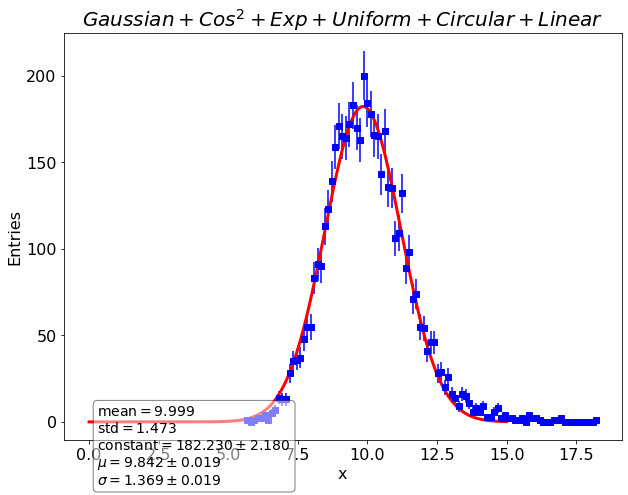

In [13]:
fit_constant6, fit_constant_error6 = popt6[0], np.sqrt(pcov6[0,0])
fit_mean6, fit_mean_error6 = popt6[1], np.sqrt(pcov6[1,1])
fit_std6, fit_std_error6 = popt6[2], np.sqrt(pcov6[2,2])

fig = plt.figure(figsize=(10,7.5))
plt.errorbar(bin_centers6, counts6, np.sqrt(counts6),
             fmt='s', color='blue', capthick=1)

#Plot fit function
plt.plot(x, gaus(x, *popt6), color='red', linewidth=3, label=r'Fitted function')

#Add titles and make the plot pretty
plt.title('$Gaussian+Cos^2+Exp+Uniform+Circular+Linear$', fontsize=20)
plt.xlabel(r'x', fontsize=16);
plt.ylabel(r'Entries', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Add a statistics box
textstr = '\n'.join((
    r'mean$=%.3f $' % (data_mean6),
    r'std$=%.3f $' % data_std6,
    r'constant$=%.3f \pm %.3f$' % (fit_constant6, fit_constant_error6),
    r'$\mu=%.3f \pm %.3f$' % (fit_mean6, fit_mean_error6),
    r'$\sigma=%.3f \pm %.3f$' % (fit_std6, fit_std_error6)))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.3, 10., textstr, fontsize=14,
        verticalalignment='top', bbox=props)